# Pràctica 1: Població mundial

## 1. Introducció

Guardem els valors de població mundial, en milers de milions, entre 1950 i 2005

In [98]:
Xt = range(1950,2010,5)

In [99]:
Yt = [2.535093, 2.770753, 3.031931, 3.342771, 3.698676, 4.076080, 4.451470, 4.855264, 5.294879, 5.719045, 6.124123, 6.514751]

In [100]:
i = var('i'); taula = list_plot([[Xt[i], Yt[i]] for i in range(0, len(Xt))])

Representació de les dades de població

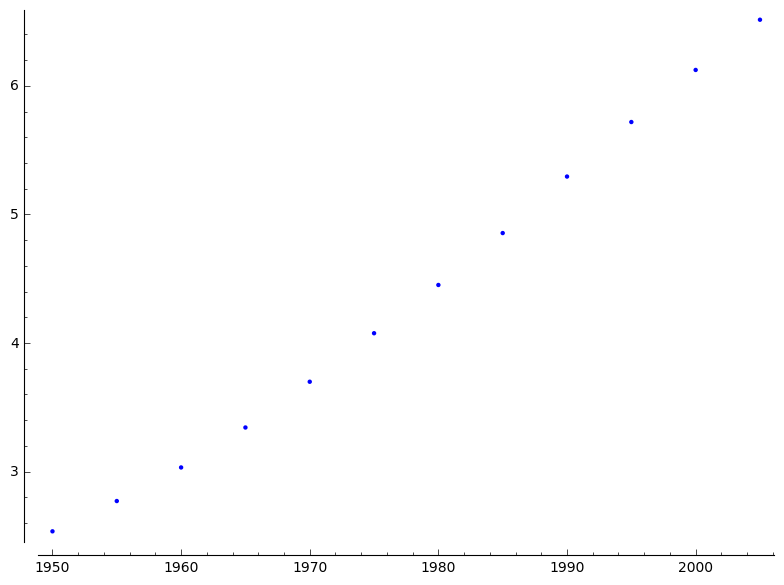

In [101]:
taula

In [102]:
dY = [(Yt[i+1] - Yt[i]) / (Xt[i+1] - Xt[i]) for i in range(0, len(Xt) - 1)]

In [103]:
dYY = [dY[i] / Yt[i] for i in range(0, len(dY))]

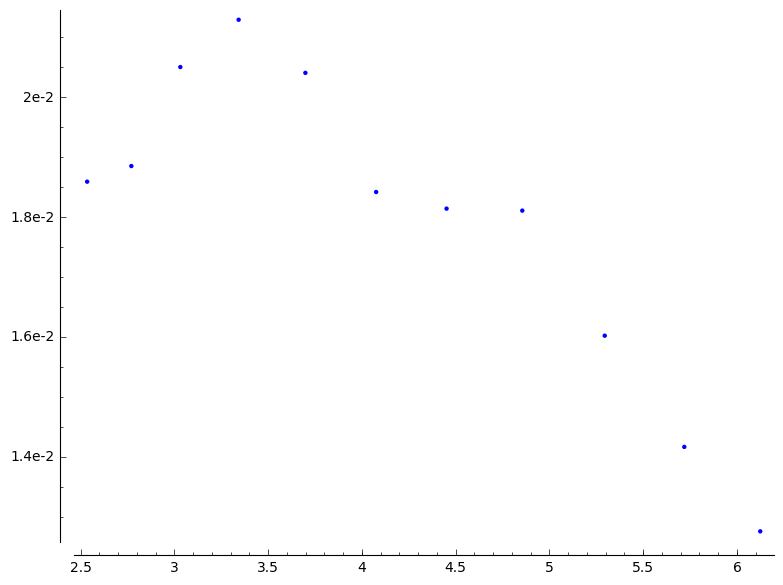

In [104]:
list_plot([[Yt[i], dYY[i]] for i in range(0, len(dY))])

## 2. Model de Malthus

Calculem la mitjana de la taxa de creixement ($p'/p$) i la fem servir per resoldre el model de Malthus, que la suposa constant

In [105]:
a0 = mean(dYY)

In [106]:
t = var('t'); p = function('p')(t)

Resolem l'equació diferencial del model de Malthus, $p'=ap$

In [107]:
odesol = desolve(diff(p(t),t) - a0*p(t), [p,t], [Xt[0], Yt[0]])

In [108]:
malthus = plot(odesol(t), (t, 1950, 2005), color='green')

Representació del model de Malthus i les dades de població

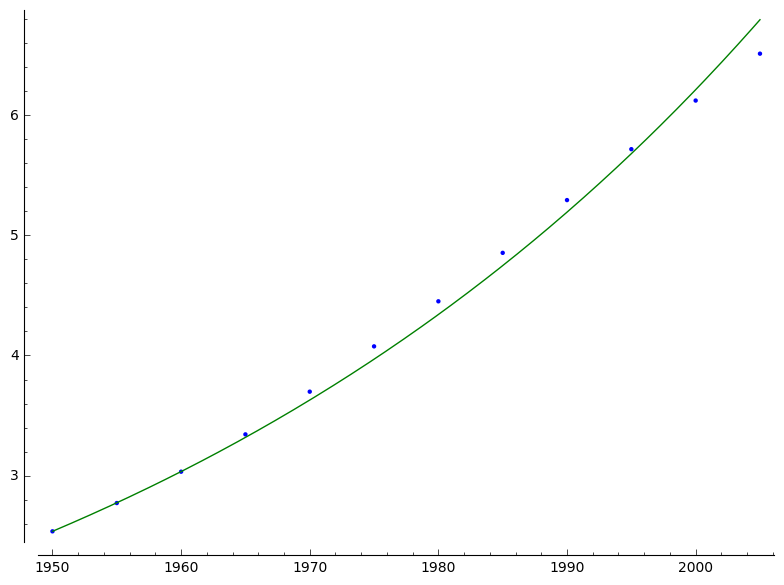

In [109]:
malthus + taula

Calculem les diferències quàdratiques per aquest model

In [110]:
sum((dYY[i] - a0)**2 for i in range(0, len(dYY)))

0.0000702567390206927

Predicció de la població l'any 2050

In [111]:
n(odesol(2050))

15.2342840086471

## 2. Model de Verhulst (I)

Suposem una taxa de creixement lineal, $p'/p = ap+b$ i fem una regressió per determinar-ne els coeficients

In [112]:
Yp = [Yt[i] for i in range(0, len(dY))]

In [113]:
YpdYY = [[Yp[i], dYY[i]] for i in range(0, len(dY))]

In [114]:
var('a,b')

(a, b)

In [115]:
model(p) = a*p + b

In [116]:
recta0 = find_fit(YpdYY, model)

In [117]:
recta0

[a == -0.0018289516293534644, b == 0.025564911399994672]

In [118]:
a1 = recta0[0].rhs(); b1 = recta0[1].rhs()

Calculem el coeficient de correlacio d'aquesta regresió

In [119]:
mitjYp = sum(Yp[i] for i in range(0, len(Yp))) / len(Yp);
mitjdYY = sum(dYY[i] for i in range(0, len(dYY))) / len(dYY)

In [120]:
varYp = sum((Yp[i] - mitjYp)**2 for i in range(0, len(Yp))) / (len(Yp) - 1);
vardYY = sum((dYY[i] - mitjdYY)**2 for i in range(0, len(dYY))) / (len(dYY) - 1)

In [121]:
corr = sum((Yp[i] - mitjYp) * (dYY[i] - mitjdYY) / (sqrt(varYp * vardYY)) for i in range(0, len(Yp))) / (len(Yp) - 1);

In [122]:
corr

-0.841520981007737

Calculem les diferències quadrades per aquest model

In [123]:
sum((dYY[i] - (a1*Yp[i] + b1))**2 for i in range(0, len(dYY)))

0.0000205038980385275

Representació de la regressió

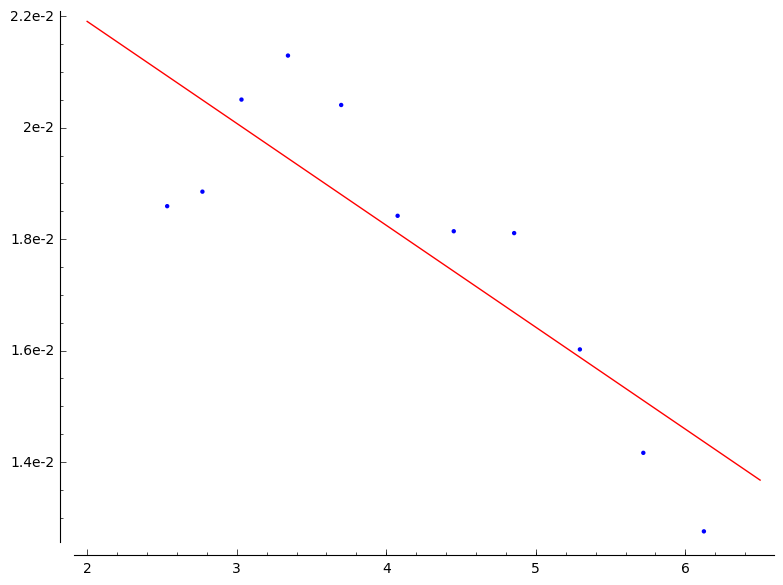

In [124]:
points(YpdYY) + plot(model(a = a1, b = b1), (p,2,6.5), color = 'red')

## 3. Model de Verhulst (II)

Fem la mateixa regressió però ara obviant els tres primers punts (de 1965 en endavant)

In [125]:
Yr = [Yt[i] for i in range(3, len(dY))]

In [126]:
YrdYY = [[Yr[i], dYY[i + 3]] for i in range(0, len(Yr))]

In [127]:
var('a,b')

(a, b)

In [128]:
model(p) = a*p + b

In [129]:
recta0 = find_fit(YrdYY, model)

In [130]:
recta0

[a == -0.0029278249856272845, b == 0.03116151428854692]

In [131]:
a2 = recta0[0].rhs(); b2 = recta0[1].rhs()

Calculem el coeficient de correlacio d'aquesta regresió

In [132]:
mitjYr = sum(Yr[i] for i in range(0, len(Yr))) / len(Yr);
mitjdYY1 = sum(dYY[i + 3] for i in range(0, len(Yr))) / len(Yr)

In [133]:
varYr = sum((Yr[i] - mitjYr)**2 for i in range(0, len(Yr))) / (len(Yr) - 1);
vardYY1 = sum((dYY[i + 3] - mitjdYY1)**2 for i in range(0, len(Yr))) / (len(Yr) - 1)

In [134]:
corr = sum((Yr[i] - mitjYr) * (dYY[i + 3] - mitjdYY1) / (sqrt(varYr * vardYY1)) for i in range(0, len(Yr))) / (len(Yr) - 1);

In [135]:
corr

-0.979556213044568

Calculem les diferències quadrades per aquest model

In [138]:
sum((dYY[i + 3] - (a2*Yr[i] + b2))**2 for i in range(0, len(Yr)))

2.43685922058400e-6

Representació de la regressió

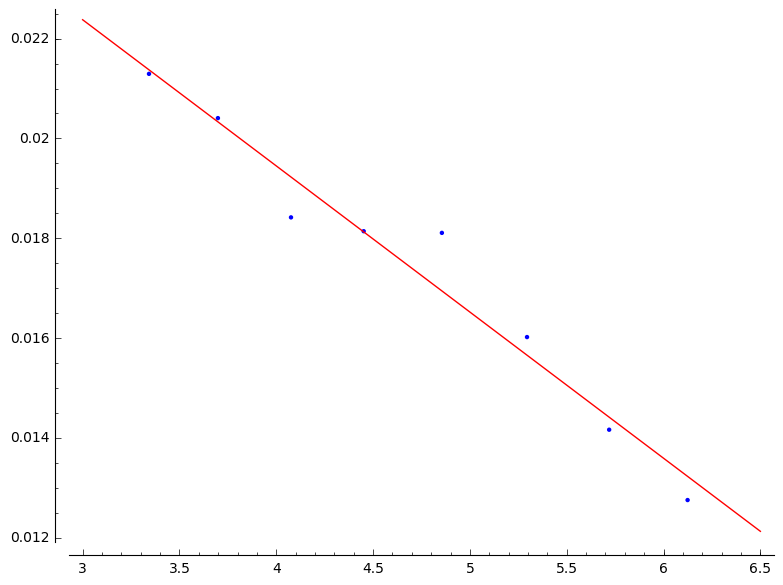

In [140]:
points(YrdYY) + plot(model(a = a2, b = b2), (p,3,6.5), color = 'red')

Resolem l'equació diferencial del model de Verhulst

In [141]:
var('a,b,y')

(a, b, y)

In [142]:
integral(1/(y*(a*y + b)), y)

-log(a*y + b)/b + log(y)/b

In [143]:
sols = solve([log(y/(a*y + b)) - log(Yt[3]/(a*Yt[3] + b)) == b*(t - Xt[3])], y)

In [144]:
sols

[y == -3342771*b*e^(b*t - 1965*b)/(3342771*a*(e^(b*t - 1965*b) - 1) - 1000000*b)]

In [167]:
Ymod3 = [sols[0].rhs().subs(a == a2, b == b2, t == 1950 + i*5) for i in range(0, 50)]

In [168]:
taulaMod = list_plot([[Xt[i], Ymod3[i]] for i in range(0, len(Xt))], color = 'orange')

Representació de les dades de població (blau) i els resultats obtinguts amb el model de Verhulst (taronja)

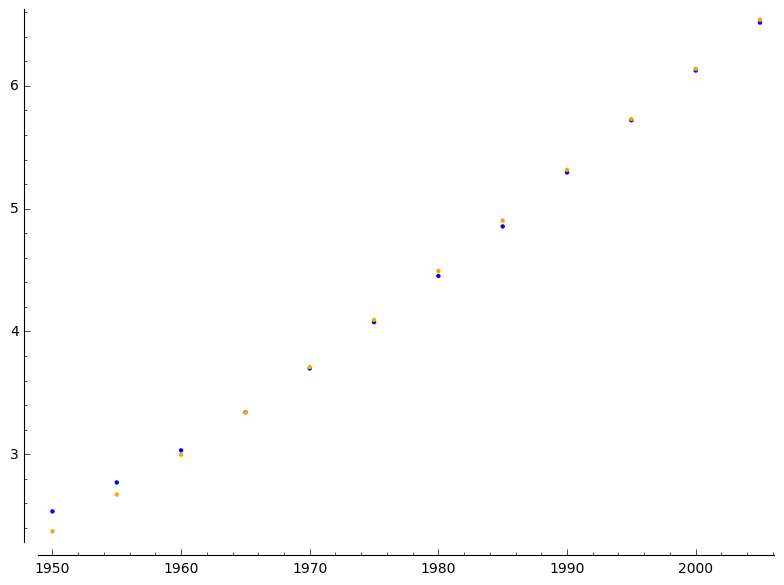

In [154]:
taula + taulaMod

In [160]:
taulaExtr = list_plot([[1950 + i*5, Ymod[i]] for i in range(0, len(Ymod))], color = 'purple')

Predicció del creixement de la població a partir d'extrapolació del model de Verhulst

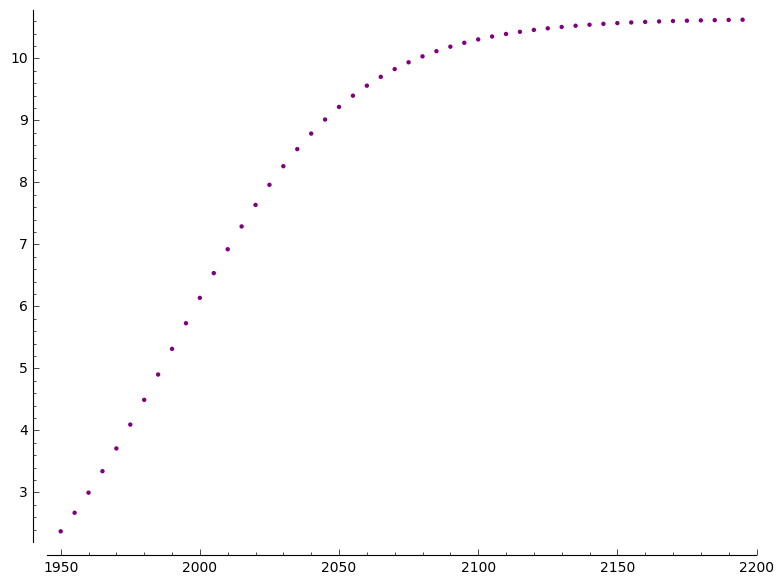

In [161]:
taulaExtr

Càlcul del valor en el que s'estabilitza la població

In [164]:
sols[0].rhs().subs(a == a2, b == b2, t == 3000)

10.643229852029535

In [171]:
Ymod1 = [odesol(1950 + i*5) for i in range(0,50)]

In [170]:
Ymod2 = [sols[0].rhs().subs(a == a1, b == b1, t == 1950 + i*5) for i in range(0, 50)]

In [178]:
taulaMod1 = list_plot([[1950 + 5*i, Ymod1[i]] for i in range(0, 12)], color = 'red')

In [179]:
taulaMod2 = list_plot([[1950 + 5*i, Ymod2[i]] for i in range(0, 12)], color = 'green')

In [180]:
taulaMod3 = list_plot([[1950 + 5*i, Ymod3[i]] for i in range(0, 12)], color = 'blue')

In [182]:
Yt1 = Yt + [6.958169159]

In [184]:
taula1 = list_plot([[1950 + 5*i, Yt[i]] for i in range(0,12)], color = 'purple')

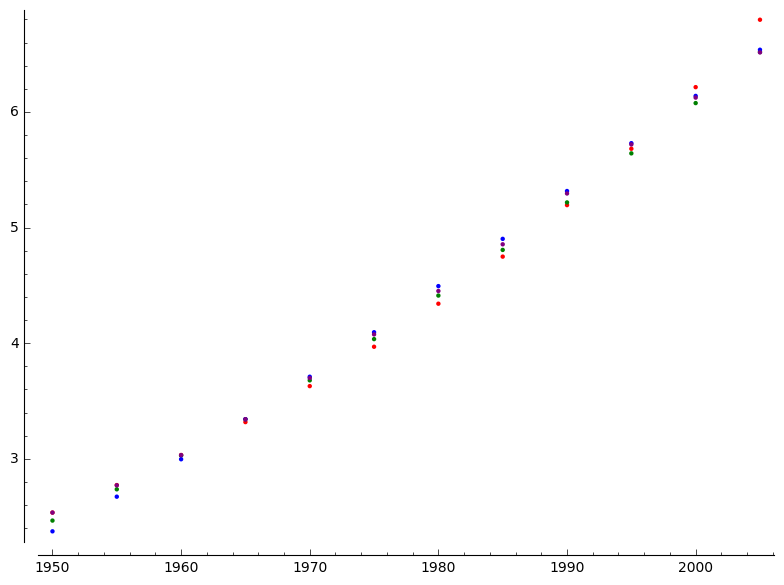

In [185]:
taulaMod1 + taulaMod2 + taulaMod3 + taula1